# Visualização

In [1]:
import pandas as pd
import numpy as np
import seaborn as srn
import matplotlib.pyplot as plt
srn.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Bases de dados/census.csv')
print(dataset.shape)
dataset.head()

(32561, 15)


,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Gráfico de dispersão

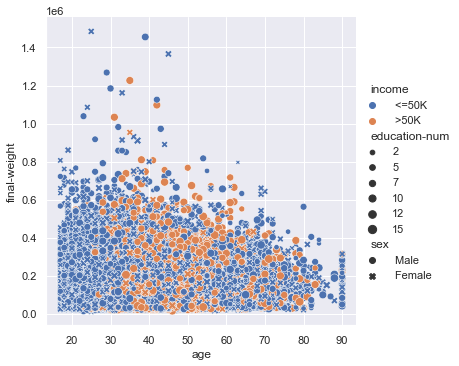

In [6]:
srn.relplot(x='age', 
            y='final-weight', 
            data=dataset,
            hue='income', 
            style='sex', 
            size='education-num');

## Gráfico de barra e setor (pizza)